<a href="https://colab.research.google.com/github/naufalfrdss/DeepLearning/blob/main/UAS/Chapter%2011/Training_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dan Load Data

In [1]:
import tensorflow as tf
from tensorflow import keras

# Load dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalisasi ke range [0, 1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Split validasi
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Callbacks

In [2]:
# Simpan model terbaik & early stopping
checkpoint_cb = keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)


Model Definition

In [3]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile Model

In [4]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])


Train Model

In [5]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/50
1716/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7517 - loss: 0.7205

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7518 - loss: 0.7202 - val_accuracy: 0.8660 - val_loss: 0.3655
Epoch 2/50
1717/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8398 - loss: 0.4441

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8398 - loss: 0.4441 - val_accuracy: 0.8704 - val_loss: 0.3486
Epoch 3/50
1714/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8568 - loss: 0.3982

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8568 - loss: 0.3982 - val_accuracy: 0.8808 - val_loss: 0.3257
Epoch 4/50
1714/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8608 - loss: 0.3819

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8608 - loss: 0.3819 - val_accuracy: 0.8838 - val_loss: 0.3157
Epoch 5/50
1718/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8669 - loss: 0.3653

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8669 - loss: 0.3653 - val_accuracy: 0.8880 - val_loss: 0.2973
Epoch 6/50
1713/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8710 - loss: 0.3496

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8710 - loss: 0.3496 - val_accuracy: 0.8914 - val_loss: 0.2931
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8753 - loss: 0.3329 - val_accuracy: 0.8886 - val_loss: 0.2965
Epoch 8/50
1718/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8787 - loss: 0.3296

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8787 - loss: 0.3296 - val_accuracy: 0.8878 - val_loss: 0.2912
Epoch 9/50
1716/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8859 - loss: 0.3128

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8859 - loss: 0.3128 - val_accuracy: 0.8926 - val_loss: 0.2909
Epoch 10/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8864 - loss: 0.3089

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8864 - loss: 0.3089 - val_accuracy: 0.8938 - val_loss: 0.2843
Epoch 11/50
1718/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8919 - loss: 0.2936

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8919 - loss: 0.2936 - val_accuracy: 0.8952 - val_loss: 0.2823
Epoch 12/50
1718/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8909 - loss: 0.2960

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8909 - loss: 0.2960 - val_accuracy: 0.8962 - val_loss: 0.2798
Epoch 13/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8943 - loss: 0.2831 - val_accuracy: 0.8936 - val_loss: 0.2815
Epoch 14/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8975 - loss: 0.2812 - val_accuracy: 0.8922 - val_loss: 0.2899
Epoch 15/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8976 - loss: 0.2781 - val_accuracy: 0.8992 - val_loss: 0.2798
Epoch 16/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8983 - loss: 0.2732 - val_accuracy: 0.8938 - val_loss: 0.2802
Epoch 17/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9035 - loss: 0.2653 - val_accuracy: 0.8976 - val_loss: 0.2800


Plot Akurasi Training & Validasi

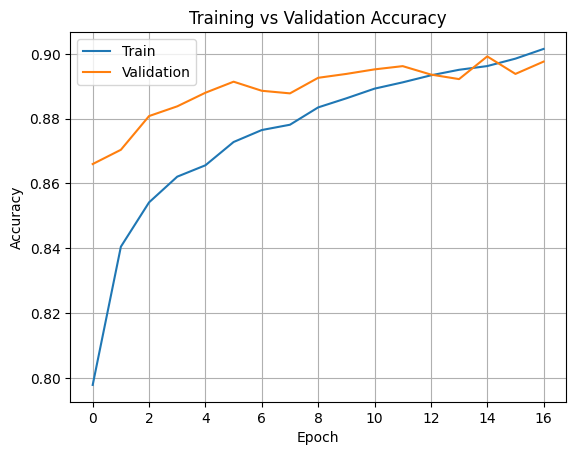

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()


Load & Evaluate Best Model

In [7]:
model = keras.models.load_model("best_model.h5")
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8892 - loss: 0.3095
Test accuracy: 0.8873000144958496
